<a href="https://colab.research.google.com/github/Manojpatil123/Machine-learning-Assignments/blob/main/General_Modelling_Techniques_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineering: Sort your Data to be  Model Ready**

# **What is Feature Engineering?**

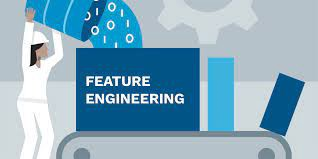

Feature engineering is a process of transforming the given data into a form which is easier to interpret. Here, we are interested in making it more transparent for a machine learning model, but some features can be generated so that the data visualization prepared for people without a data-related background can be more digestible. However, the concept of transparency for the machine learning models is a complicated thing as different models often require different approaches for the different kinds of data.



Feature engineering is an informal topic, and there are many possible definitions. The machine learning workflow is fluid and iterative, so there’s no one “right answer.”

In a nutshell, we define feature engineering as creating new features from your existing ones to improve model performance.

# **Why do we need it?**

The intention of feature engineering is to achieve two primary goals:

1.	Preparing an input dataset that is compatible with and best fits the machine learning algorithm.

2.	Improving the performance of machine learning models 

According to a survey in Forbes, data scientists spend 80% of their time on data preparation. The importance of feature engineering is realized through its time-efficient approach to preparing data that brings consistent output.


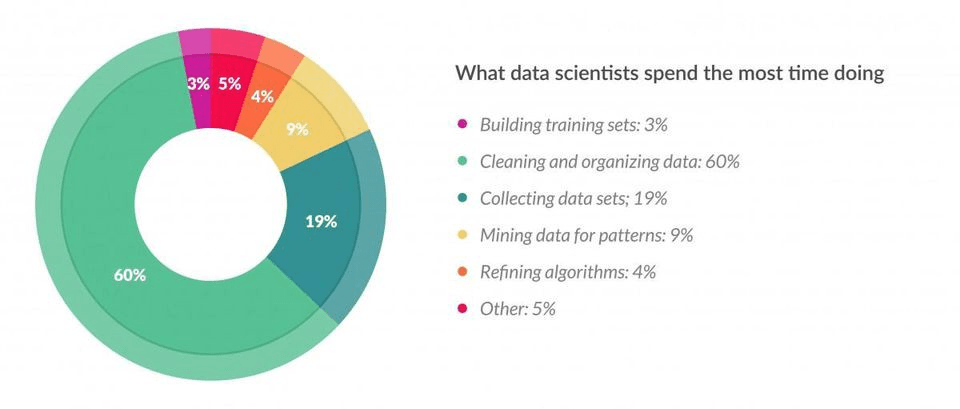

When feature engineering processes are executed well, the resulting dataset will be optimal and contain all the essential factors that bear an impact on the business problem. These datasets in turn result in best possible predictive models and most beneficial insights.

# **Basic EDA**

### **1. Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

Ex:- CDF, PDF, Box plot, Violin plot.

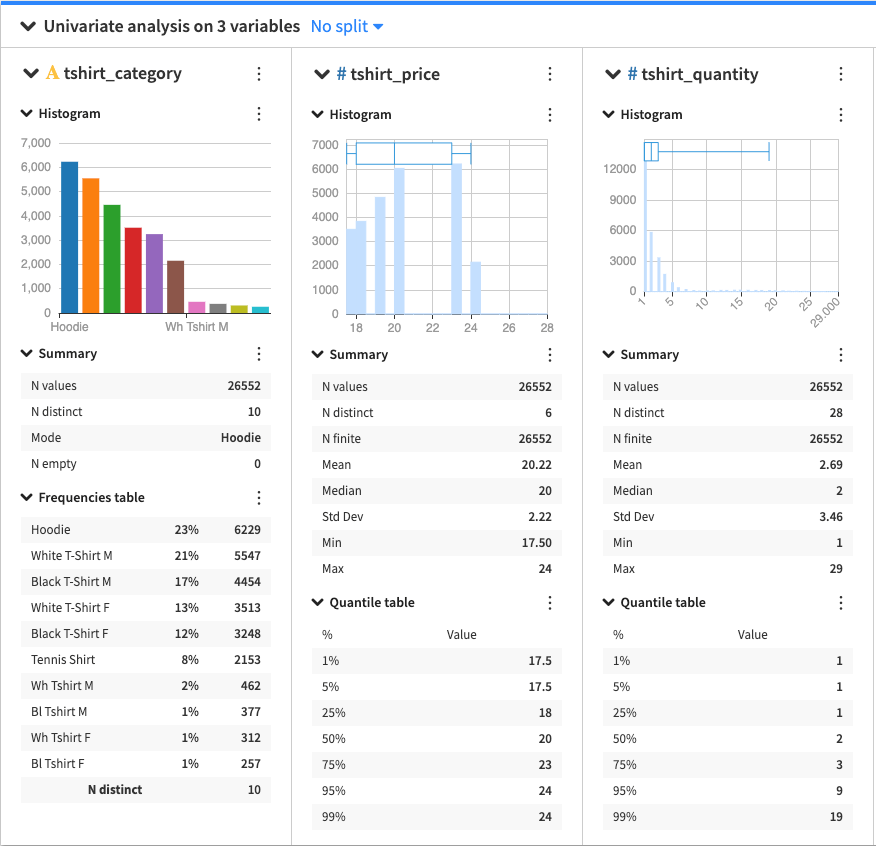

### **2. Bivariate analysis**

Bivariate analysis means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y. The results from bivariate analysis can be stored in a two-column data table. 

Ex:- Box plot, Scatter Plot,Violin plot, Joint plot.

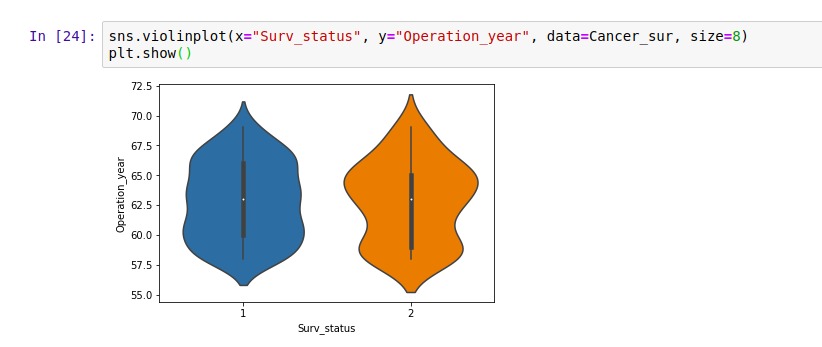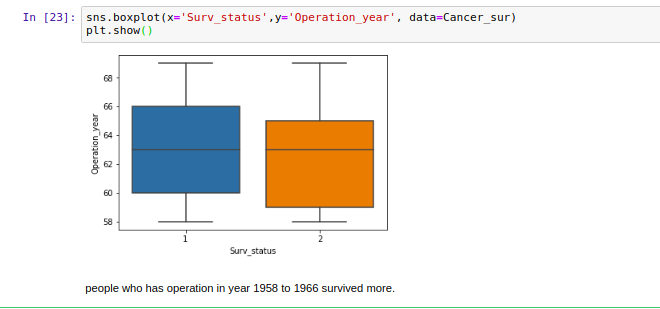

### **3.	Multivariate Analysis**

Multivariate means more than one variable behind the resultant outcome. Anything that happens in the world or business is not due to one reason but multiple reasons behind the outcome known as multivariate. As an example, Weather is dependent on multiple factors like pollution, precipitation, humidity to name a few.

Ex:- Pair Plot, 3D Scatter Plot.

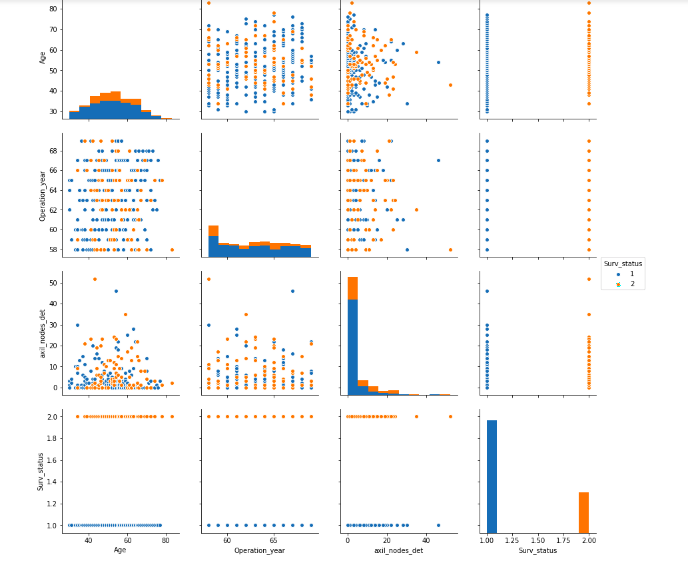

# **Let's dive into Feature Engineering with the help of the Housing Dataset.**

## **Problem Statement**

The dataset for this project has been taken from Kaggle's Housing Data Set Knowledge Competition. This project aims at predicting house prices (residential) in Ames, Iowa, USA. We will do some feature engineering on top of this data and prepare the data to be model-ready to implement the Machine Learning Algorithm.

## **Dataset Information**



Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


Functional: Home functionality rating

Fireplaces: Number of fireplaces


FireplaceQu: Fireplace quality
GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


## **Importing**

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset
data_train = pd.read_csv('/content/drive/MyDrive/Feature Engineering materials/train.csv')

## **Dataset Inspection**

In [ ]:
# First Look
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_train.shape

(1460, 81)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

## **Thought Process**



What actually will drive the SalesPrice?

1. Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).

2. If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).


3. Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

Questions you ask before buying any house - 

1. How old it is?

2. What is the condition of house?

3. Where is it located?

... Lot more..




## **Handling Missing Data**


From the entry totals above, many of the features are missing a significant amount of data. Explore these columns further to determine the best approach for each.

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = data_train.columns[data_train.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data_train[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data_train[show_missing()].isnull().sum().sort_values(ascending = False)/len(data_train)*100,2))

Missing Data Count
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [ ]:
# Functions to address missing data

# Explore features
def feat_explore(column):
    return data_train[column].value_counts()

# Function to impute missing values
def feat_impute(column, value):
    data_train.loc[data_train[column].isnull(),column] = value

Over 50% Missing

PoolQC, MiscFeature, Alley, Fence will all be removed as they are missing over half of their observations.

In [ ]:
# Features with over 50% of its observations missings will be removed
data_train = data_train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis = 1)

#### Fireplace Qu
FireplaceQu is missing 690 observations. However, these nulls may be attributed to homes that do not have fireplaces at all. If this assumption proves to be true, we can impute these nulls with '0' as they do not have a fireplace.

In [ ]:
# FireplaceQu missing data
print('FireplaceQu Missing Before:', data_train['FireplaceQu'].isnull().sum())
print('--'*40)

# The null values may be homes that do not have fireplaces at all. Need to check this assumption
print(data_train[data_train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']])
print(data_train[data_train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']].shape)
print('--'*40)

# Impute the nulls with None 
data_train['FireplaceQu'] = data_train['FireplaceQu'].fillna('None')
print('FireplaceQu Missing After:', data_train['FireplaceQu'].isnull().sum())

print('--'*40)
# Cross check columns
print('Confirm Imputation')
print(pd.crosstab(data_train.FireplaceQu,data_train.Fireplaces,))

FireplaceQu Missing Before: 690
--------------------------------------------------------------------------------
      Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
...          ...         ...
1452           0         NaN
1453           0         NaN
1454           0         NaN
1458           0         NaN
1459           0         NaN

[690 rows x 2 columns]
(690, 2)
--------------------------------------------------------------------------------
FireplaceQu Missing After: 0
--------------------------------------------------------------------------------
Confirm Imputation
Fireplaces     0    1   2  3
FireplaceQu                 
Ex             0   19   4  1
Fa             0   28   4  1
Gd             0  324  54  2
None         690    0   0  0
Po             0   20   0  0
TA             0  259  53  1


#### Lot Frontage

LotFrontage is missing 259 observations. We will impute with the median/mean LotFrontage value

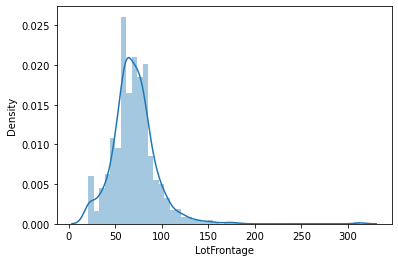

In [ ]:
sns.distplot(data_train.LotFrontage.dropna())

#### Positively Skewed - So we will impute it with Median

In [ ]:
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].median())
print('LotFrontage Missing After:', data_train['LotFrontage'].isnull().sum())

LotFrontage Missing After: 0


#### Garage Features

GarageYrBlt, GarageType, GarageFinish,GarageQual, and GarageCond are all missing 81 observations. These null values are assumed to be in the same rows for each column and associated with homes that do not have garages at all. If these assumptions are correct, the nulls can be inputed with zero as these are properties without garages.

In [ ]:
print(data_train[['GarageYrBlt', 'GarageType', 'GarageFinish','GarageQual','GarageCond']].isnull().sum())

# Assumptions check
print('--'*50)
print('Assumption Check')
null_garage = ['GarageYrBlt','GarageType','GarageQual','GarageCond','GarageFinish']
print(data_train[(data_train['GarageYrBlt'].isnull())|
                 (data_train['GarageType'].isnull())|
                 (data_train['GarageQual'].isnull())|
                 (data_train['GarageCond'].isnull())|
                 (data_train['GarageFinish'].isnull())]
                 [['GarageCars','GarageYrBlt','GarageType','GarageQual','GarageCond','GarageFinish']])

# Impute null garage features
for cols in null_garage:
   if data_train[cols].dtype == np.object:
         feat_impute(cols, 'None')
   else:
         feat_impute(cols, 0)
        
# Garage Features After
print('--'*50)
print('Garage Features Missing After')
print(data_train[['GarageYrBlt', 'GarageType', 'GarageFinish','GarageQual','GarageCond']].isnull().sum())
print('--'*50)
# Cross check columns
print('Confirm Imputation')
for cols in null_garage:
    print(pd.crosstab(data_train[cols],data_train.GarageCars))

GarageYrBlt     81
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64
----------------------------------------------------------------------------------------------------
Assumption Check
      GarageCars  GarageYrBlt GarageType GarageQual GarageCond GarageFinish
39             0          NaN        NaN        NaN        NaN          NaN
48             0          NaN        NaN        NaN        NaN          NaN
78             0          NaN        NaN        NaN        NaN          NaN
88             0          NaN        NaN        NaN        NaN          NaN
89             0          NaN        NaN        NaN        NaN          NaN
...          ...          ...        ...        ...        ...          ...
1349           0          NaN        NaN        NaN        NaN          NaN
1407           0          NaN        NaN        NaN        NaN          NaN
1449           0          NaN        NaN        NaN        NaN          NaN
1450          

#### Basement Features

BsmtFinType2 and 'BsmtExposure are both missing 38 observations. It is suspected that these observations are in the same rows for both columns and associated with homes that do not have basements. If these assumptions are true, we can impute the nulls with zero as we have for other missing values previously.

In [ ]:
# Basement Features
print('Basement Features Missing Before')
print(data_train[['BsmtFinType2', 'BsmtExposure']].isnull().sum())
print('--'*50)

# BsmtFinType2 and BsmtExposure are both missing 38 observations
# Check that data is missing in the same rows
# Confirm if all nulls correspond to homes without basements
print('Assumption Check')
null_basement = ['BsmtFinType2','BsmtExposure']
print(data_train[data_train['BsmtFinType2'].isnull()|(data_train['BsmtExposure'].isnull())][['TotalBsmtSF','BsmtFinType2','BsmtExposure']])
print('entries',data_train[data_train['BsmtFinType2'].isnull()|(data_train['BsmtExposure'].isnull())][['TotalBsmtSF','BsmtFinType2','BsmtExposure']].shape)

Basement Features Missing Before
BsmtFinType2    38
BsmtExposure    38
dtype: int64
----------------------------------------------------------------------------------------------------
Assumption Check
      TotalBsmtSF BsmtFinType2 BsmtExposure
17              0          NaN          NaN
39              0          NaN          NaN
90              0          NaN          NaN
102             0          NaN          NaN
156             0          NaN          NaN
182             0          NaN          NaN
259             0          NaN          NaN
332          3206          NaN           No
342             0          NaN          NaN
362             0          NaN          NaN
371             0          NaN          NaN
392             0          NaN          NaN
520             0          NaN          NaN
532             0          NaN          NaN
533             0          NaN          NaN
553             0          NaN          NaN
646             0          NaN          NaN
705   

Most of the nulls are homes without basements; however, there are two exceptions that must be addressed before we can impute the nulls with zero.

BsmTfinType2 at index 332 is null, but has a basement of 3206 sq feet.
BsmtExposure at index 948 is null, but has a basement of 936 sq feet.

These two exceptions will be imputed with that column's most frequent value. The remaning null values will be imputed with 'None' as they corresond to homes without basements.

In [ ]:
# Impute the only null BsmtFinType2 with a basement at index 332 with most frequent value
data_train.iloc[332, data_train.columns.get_loc('BsmtFinType2')] = data_train['BsmtFinType2'].mode()[0]


# Impute the only null BsmtExposure with a basement at index 948 with most frequent value
data_train.iloc[948, data_train.columns.get_loc('BsmtExposure')] = data_train['BsmtExposure'].mode()[0]

# Impute the remaining nulls as None
for cols in null_basement:
   if data_train[cols].dtype ==np.object:
         feat_impute(cols, 'None')
   else:
         feat_impute(cols, 0)

# Basement Features After
print('--'*40)
print('Basement Features Missing After')
print(data_train[['BsmtFinType2', 'BsmtExposure']].isnull().sum())
print('--'*40)
# Cross check columns
print('Confirm Imputation')
for cols in null_basement:
    print(pd.crosstab(data_train.TotalBsmtSF,data_train[cols]))

--------------------------------------------------------------------------------
Basement Features Missing After
BsmtFinType2    0
BsmtExposure    0
dtype: int64
--------------------------------------------------------------------------------
Confirm Imputation
BsmtFinType2  ALQ  BLQ  GLQ  LwQ  None  Rec  Unf
TotalBsmtSF                                     
0               0    0    0    0    37    0    0
105             0    0    0    0     0    0    1
190             0    0    0    0     0    0    1
264             0    0    0    0     0    0    3
270             0    0    0    0     0    0    1
...           ...  ...  ...  ...   ...  ...  ...
3094            1    0    0    0     0    0    0
3138            0    0    0    0     0    0    1
3200            0    0    0    0     0    0    1
3206            0    0    0    0     0    0    1
6110            0    0    0    0     0    0    1

[721 rows x 7 columns]
BsmtExposure  Av  Gd  Mn  No  None
TotalBsmtSF                       
0      

There is another set of basement features that are missing the same number of observations. BsmtFinType1, BsmtCond, BsmtQual all have 37 missing values. It is assumed that these observations are in the same rows and correspond to homes that do not have basements. If these assumptions are true, we will impute nulls with 'None', otherwise impute using the most frequent value for each feature.

In [ ]:
print('Basement Features Part 2 Missing Before')
print(data_train[['BsmtFinType1', 'BsmtCond','BsmtQual']].isnull().sum())
print('--'*50)

# Check assumptions
null_basement2 = ['BsmtFinType1', 'BsmtCond','BsmtQual']
print('Assumption Check')
print(data_train[(data_train['BsmtFinType1'].isnull())|
                 (data_train['BsmtCond'].isnull())|
                 (data_train['BsmtQual'].isnull())]
                 [['TotalBsmtSF','BsmtFinType1', 'BsmtCond','BsmtQual']])
print('entries',data_train[(data_train['BsmtFinType1'].isnull())|
                 (data_train['BsmtCond'].isnull())|
                 (data_train['BsmtQual'].isnull())]
                 [['TotalBsmtSF','BsmtFinType1', 'BsmtCond','BsmtQual']].shape)


# Impute nulls to None or 0
for cols in null_basement2:
    if data_train[cols].dtype ==np.object:
        cols = feat_impute(cols, 'None')
    else:
        cols = feat_impute(cols, 0)    

print('--'*50)
print('Basement Features Part 2 Missing After')
print(data_train[['BsmtFinType1', 'BsmtCond','BsmtQual']].isnull().sum())

Basement Features Part 2 Missing Before
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
dtype: int64
----------------------------------------------------------------------------------------------------
Assumption Check
      TotalBsmtSF BsmtFinType1 BsmtCond BsmtQual
17              0          NaN      NaN      NaN
39              0          NaN      NaN      NaN
90              0          NaN      NaN      NaN
102             0          NaN      NaN      NaN
156             0          NaN      NaN      NaN
182             0          NaN      NaN      NaN
259             0          NaN      NaN      NaN
342             0          NaN      NaN      NaN
362             0          NaN      NaN      NaN
371             0          NaN      NaN      NaN
392             0          NaN      NaN      NaN
520             0          NaN      NaN      NaN
532             0          NaN      NaN      NaN
533             0          NaN      NaN      NaN
553             0          NaN      N

#### Masonry Features

MasVnrArea and MasVnrType are both missing 8 observations. Again, we'll check to see they are missing in the same rows and then impute with the most frequent value for each column.

In [ ]:
# MasVnrArea and MasVnrType are each missing 8 observations
print('Masonry Features Missing Before')
print(data_train[['MasVnrArea', 'MasVnrType']].isnull().sum())
print('--'*50)

# Confirm that the missing values in these columns are the same rows
print('Check Assumptions')
print(data_train[(data_train['MasVnrArea'].isnull())|
                 (data_train['MasVnrType'].isnull())]
                 [['MasVnrArea','MasVnrType']])

print(data_train[(data_train['MasVnrArea'].isnull())|
                 (data_train['MasVnrType'].isnull())]
                 [['MasVnrArea','MasVnrType']].shape)

# Impute MasVnrArea with the most frequent values

data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mode()[0])

# Impute MasVnrType with the most frequent values

data_train['MasVnrType'] = data_train['MasVnrType'].fillna(data_train['MasVnrType'].mode()[0])

print('Masonry Features Missing After')
print(data_train[['MasVnrArea', 'MasVnrType']].isnull().sum())
print('--'*50)

print('Confirm Imputation')
print(data_train[(data_train['MasVnrArea'].isnull())|
                 (data_train['MasVnrType'].isnull())]
                 [['MasVnrArea','MasVnrType']])

Masonry Features Missing Before
MasVnrArea    8
MasVnrType    8
dtype: int64
----------------------------------------------------------------------------------------------------
Check Assumptions
      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN
(8, 2)
Masonry Features Missing After
MasVnrArea    0
MasVnrType    0
dtype: int64
----------------------------------------------------------------------------------------------------
Confirm Imputation
Empty DataFrame
Columns: [MasVnrArea, MasVnrType]
Index: []


#### Electrical
Electrical is only missing one observation, which can be imputed with the most frequent value in the column.

In [ ]:
print('Electrical Feature Missing Before')
print(data_train[['Electrical']].isnull().sum())
print('--'*50)

# Impute Electrical with the most frequent value, 'SBrkr'

data_train['Electrical'] = data_train['Electrical'].fillna(data_train['Electrical'].mode()[0])
print('Electrical Feature Missing After')
print(data_train[['Electrical']].isnull().sum())
print('--'*50)

Electrical Feature Missing Before
Electrical    1
dtype: int64
----------------------------------------------------------------------------------------------------
Electrical Feature Missing After
Electrical    0
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## **Handling Outliers**

In [ ]:
# find categorical variables
categorical = [var for var in data_train.columns if data_train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 39 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in data_train.columns if data_train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 38 numerical variables


In [ ]:
discrete = []
for var in numerical:
    if len(data_train[var].unique())<20:
        print(var, ' values: ', data_train[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold  values:  [2008 2007 2006 2009 2010]
There are 15 discrete variables


In [ ]:
continuous = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice']]

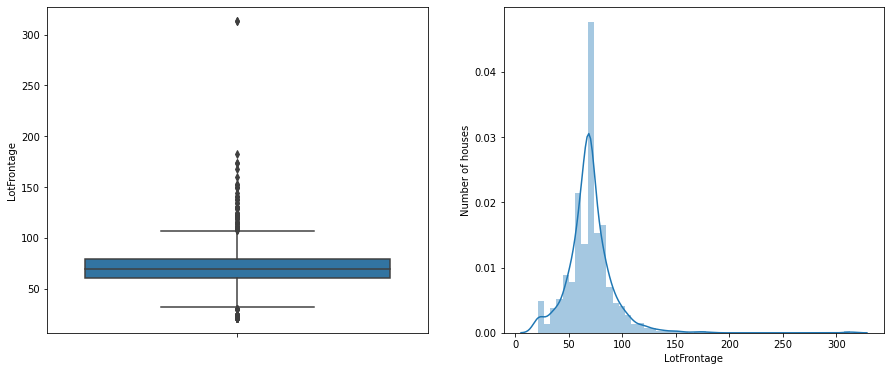

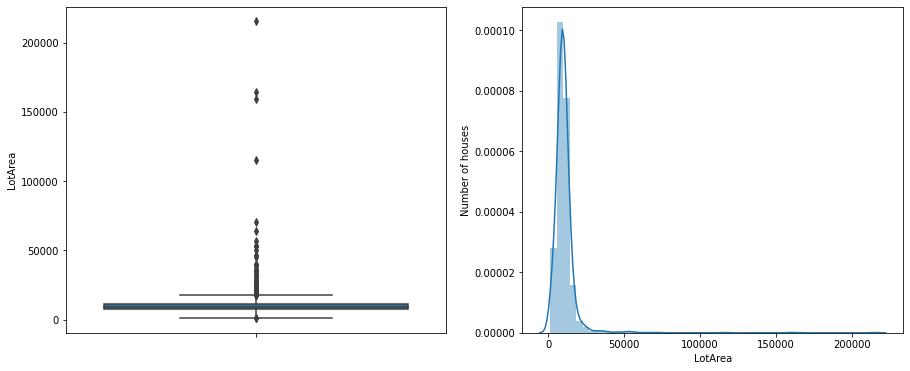

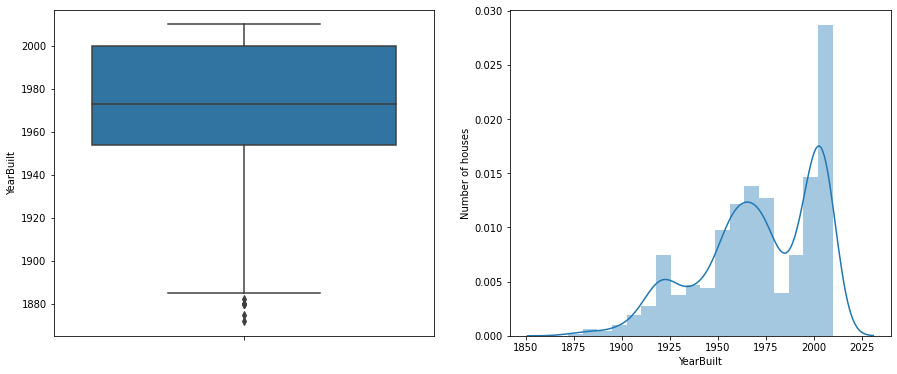

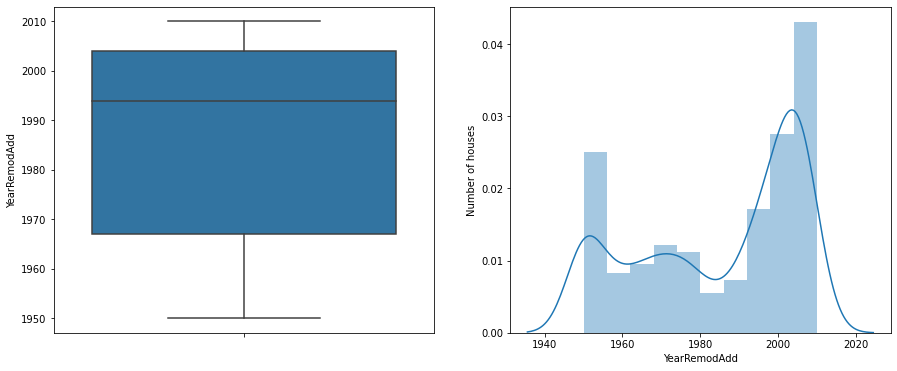

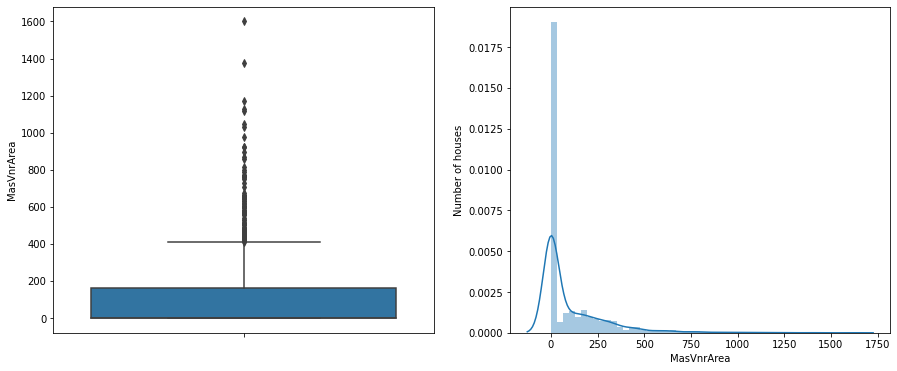

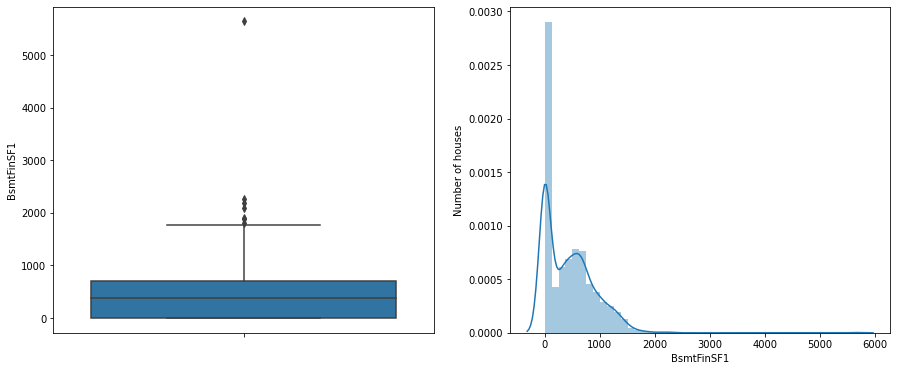

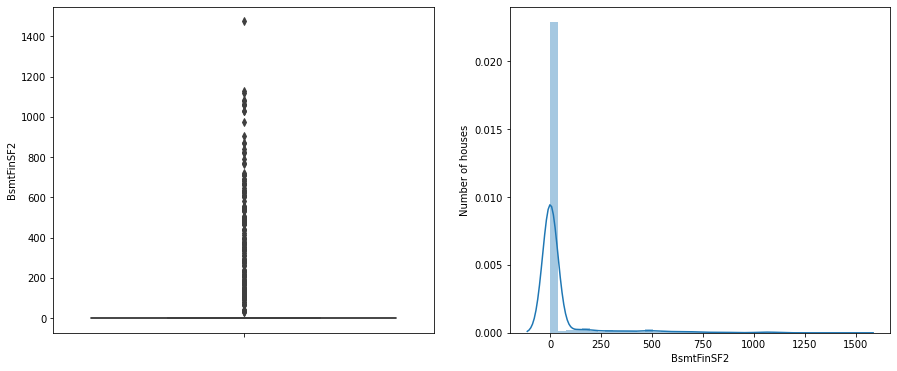

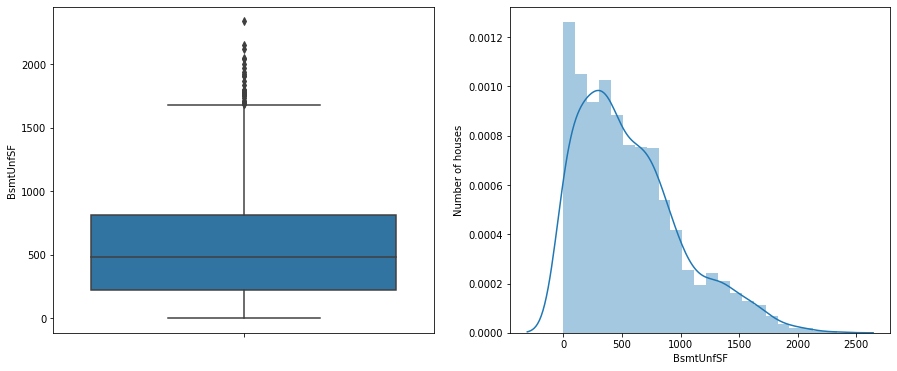

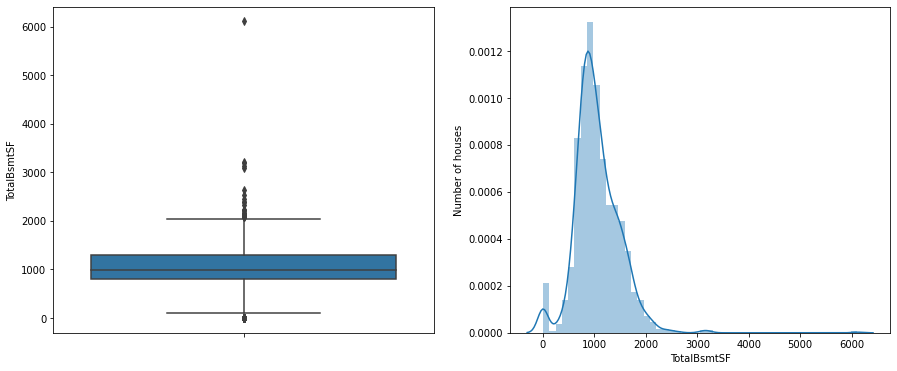

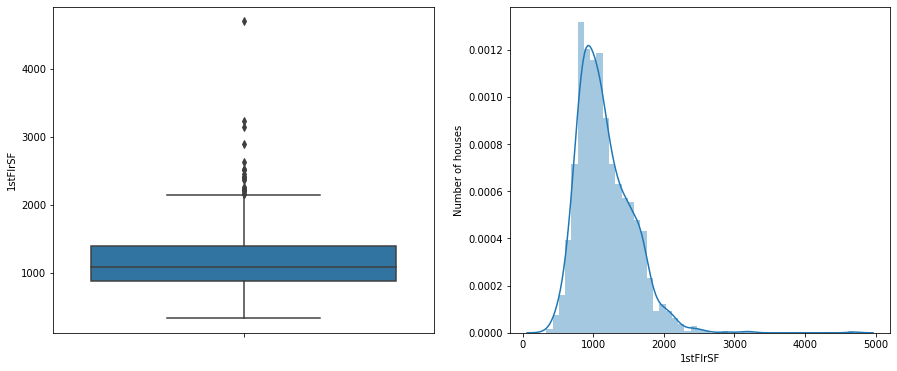

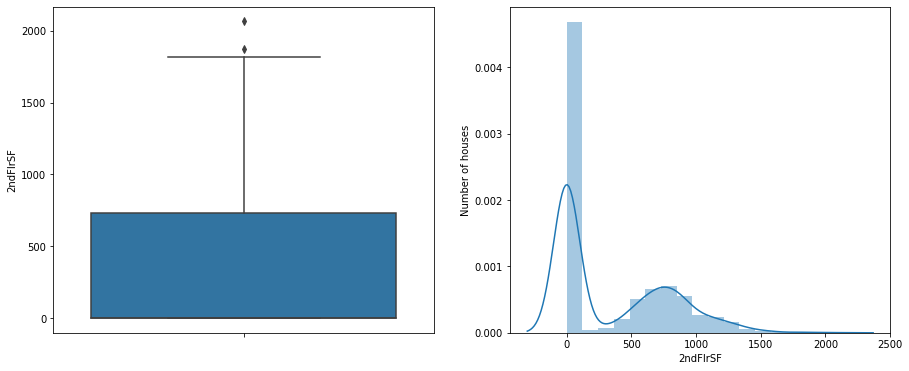

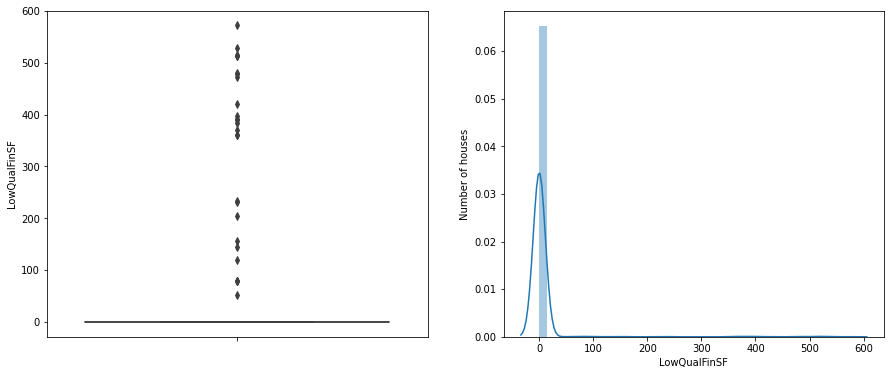

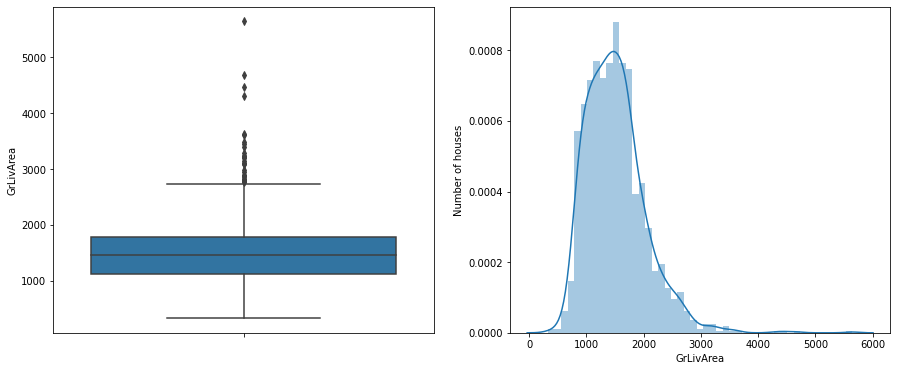

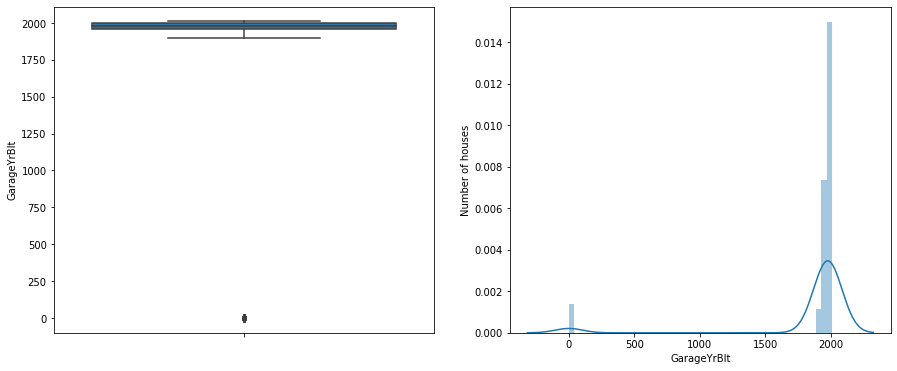

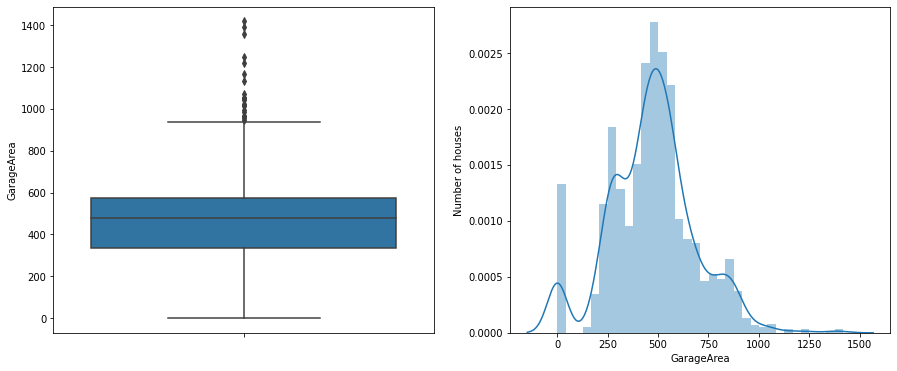

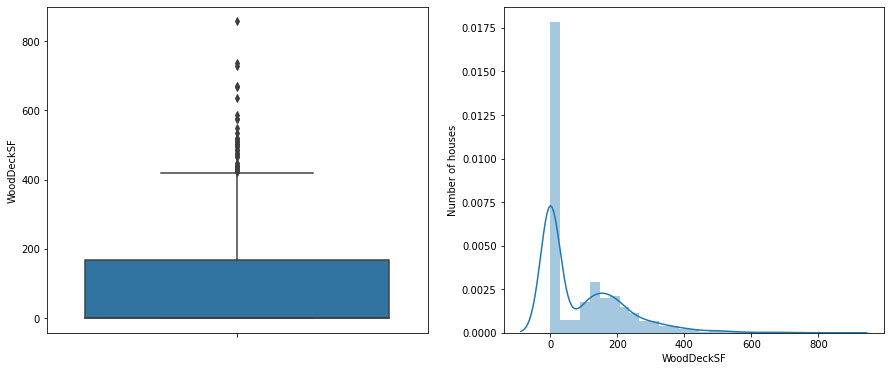

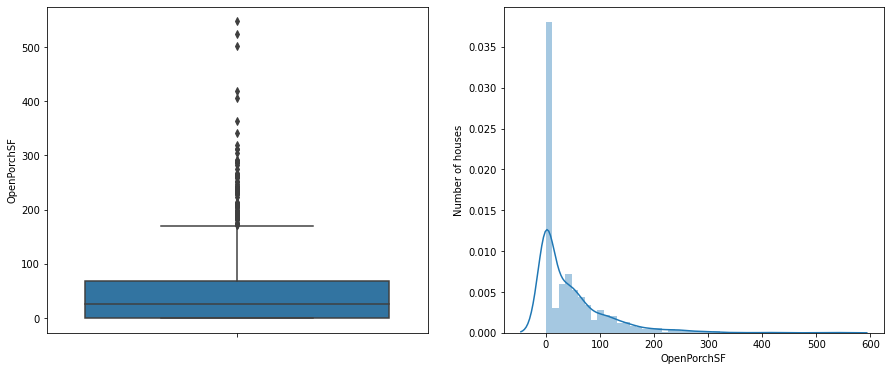

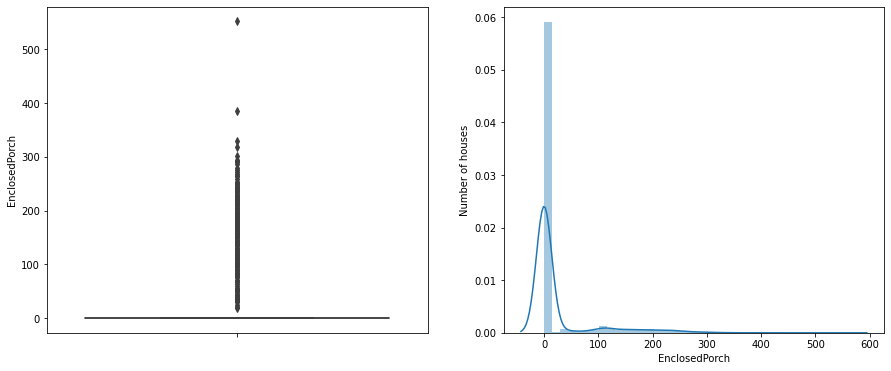

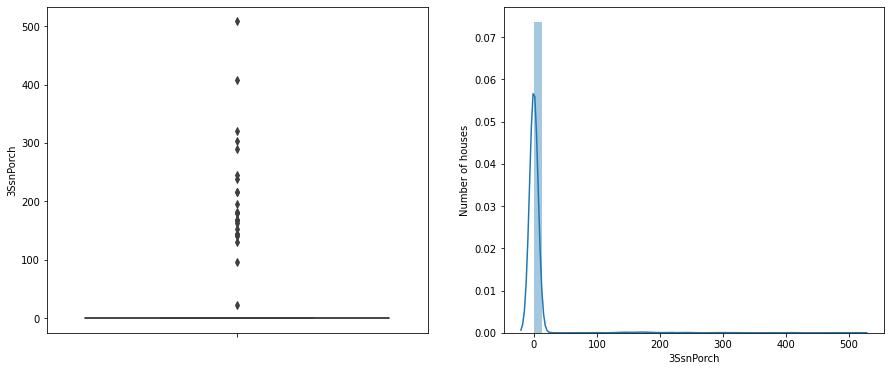

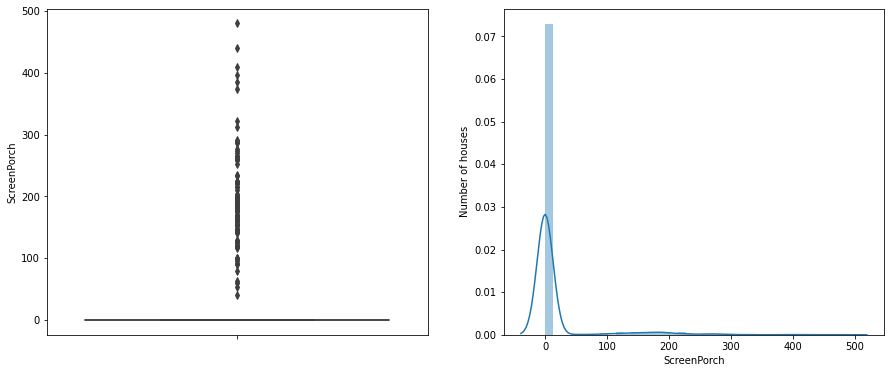

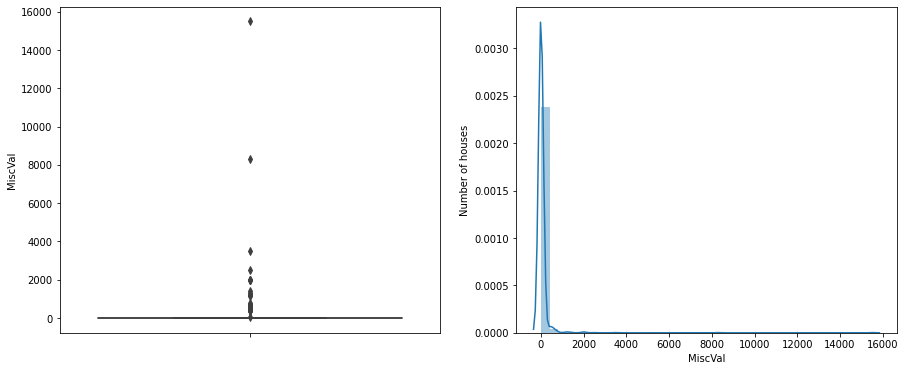

In [ ]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data_train[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data_train[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we should tackle these to improve the model performance.

### **Drop or Cap Outliers**

In [ ]:
# #Dropping the outlier rows with standard deviation
# # We are not dropping observation as we have very less data
# factor = 3
# upper_lim = data['column'].mean () + data['column'].std () * factor
# lower_lim = data['column'].mean () - data['column'].std () * factor

# data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

# #Dropping the outlier rows with Percentiles
# upper_lim = data['column'].quantile(.95)
# lower_lim = data['column'].quantile(.05)

# data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

In [ ]:
#Capping the outlier rows with Percentiles
upper_lim = data_train['LotFrontage'].quantile(.95)
lower_lim = data_train['LotFrontage'].quantile(.05)
data_train.loc[(data_train["LotFrontage"] > upper_lim),"LotFrontage"] = upper_lim
data_train.loc[(data_train["LotFrontage"] < lower_lim),"LotFrontage"] = lower_lim

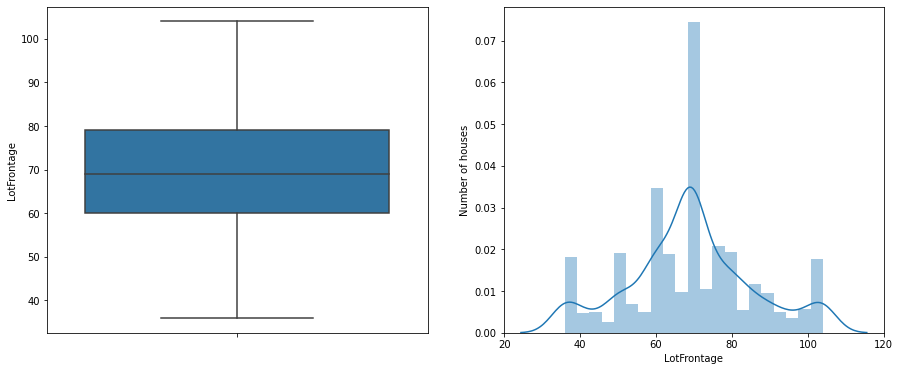

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=data_train["LotFrontage"])
fig.set_title('')
fig.set_ylabel("LotFrontage")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(data_train["LotFrontage"].dropna())
fig.set_ylabel('Number of houses')
fig.set_xlabel("LotFrontage")

plt.show()

In [ ]:
# outlies in discrete variables
for var in discrete:
    print(data_train[var].value_counts() / np.float(len(data_train)))
    print()

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64

3    0.550685
2    0.245205
4    0.145890
1    0

## **Binning**

In [ ]:
#OverallQual
bins = [0, 5, 7,10]
pd.cut(data_train['OverallQual'], bins).value_counts()


(5, 7]     693
(0, 5]     538
(7, 10]    229
Name: OverallQual, dtype: int64

In [ ]:
data_train['OverallQual_binned'] = pd.cut(data_train['OverallQual'], bins)

## **Reducing cardinality**

In [ ]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
#This may be a problem for some machine learning models.
for var in categorical:
    print(var, ' contains ', len(data_train[var].unique()), ' labels')

MSZoning  contains  5  labels
Street  contains  2  labels
LotShape  contains  4  labels
LandContour  contains  4  labels
Utilities  contains  2  labels
LotConfig  contains  5  labels
LandSlope  contains  3  labels
Neighborhood  contains  25  labels
Condition1  contains  9  labels
Condition2  contains  8  labels
BldgType  contains  5  labels
HouseStyle  contains  8  labels
RoofStyle  contains  6  labels
RoofMatl  contains  8  labels
Exterior1st  contains  15  labels
Exterior2nd  contains  16  labels
MasVnrType  contains  4  labels
ExterQual  contains  4  labels
ExterCond  contains  5  labels
Foundation  contains  6  labels
BsmtQual  contains  5  labels
BsmtCond  contains  5  labels
BsmtExposure  contains  5  labels
BsmtFinType1  contains  7  labels
BsmtFinType2  contains  7  labels
Heating  contains  6  labels
HeatingQC  contains  5  labels
CentralAir  contains  2  labels
Electrical  contains  5  labels
KitchenQual  contains  4  labels
Functional  contains  7  labels
FireplaceQu  contai

If We want to reduce cardinality 

<b> Note </b> keep the level same  categorical labels

## **Feature Encoding**

In [ ]:
# Encode ordinal data
data_train['LotShape'] = data_train['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
data_train['LandContour'] = data_train['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
data_train['Utilities'] = data_train['Utilities'].map({'NoSeWa':0,'NoSeWa':1,'AllPub':2})
data_train['BldgType'] = data_train['BldgType'].map({'Twnhs':0,'TwnhsE':1,'Duplex':2,'2fmCon':3,'1Fam':4})
data_train['HouseStyle'] = data_train['HouseStyle'].map({'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data_train['LandSlope'] = data_train['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
data_train['Street'] = data_train['Street'].map({'Grvl':0,'Pave':1})
data_train['MasVnrType'] = data_train['MasVnrType'].map({'None':0,'BrkCmn':1,'BrkFace':2,'CBlock':3,'Stone':4})
data_train['CentralAir'] = data_train['CentralAir'].map({'N':0,'Y':1})
data_train['GarageFinish'] = data_train['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
data_train['PavedDrive'] = data_train['PavedDrive'].map({'N':0,'P':1,'Y':2})
data_train['BsmtExposure'] = data_train['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data_train['ExterQual'] = data_train['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['ExterCond'] = data_train['ExterCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['BsmtCond'] = data_train['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['BsmtQual'] = data_train['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['HeatingQC'] = data_train['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['KitchenQual'] = data_train['KitchenQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['FireplaceQu'] = data_train['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['GarageQual'] = data_train['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_train['GarageCond'] = data_train['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [ ]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
one_hot_Foundation = onehotencoder.fit_transform(np.array(data_train['Foundation']).reshape(-1,1)).toarray() 

In [ ]:
one_hot_Foundation

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [ ]:
np.sum(one_hot_Foundation,axis=0)

array([146., 634., 647.,  24.,   6.,   3.])

In [ ]:
data_train['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [ ]:
one_hot_df = pd.DataFrame(one_hot_Foundation,columns=['BrkTil','CBlock','PConc','Slab','Stone','Wood'])
one_hot_df.head()

,BrkTil,CBlock,PConc,Slab,Stone,Wood
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_train = pd.concat([data_train,one_hot_df],axis=1)

In [ ]:
# Encode Categorical Variables
data_train['Heating'] = data_train['Heating'].map({'Floor':0,'GasA':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})
data_train['Electrical'] = data_train['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
data_train['Functional'] = data_train['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
data_train['GarageType'] = data_train['GarageType'].map({'None':0,'Detchd':1,'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6})
data_train['SaleType'] = data_train['SaleType'].map({'Oth':0,'ConLD':1,'ConLI':2,'ConLw':3,'Con':4,'COD':5,'New':6,'VWD':7,'CWD':8,'WD':9})
data_train['SaleCondition'] = data_train['SaleCondition'].map({'Partial':0,'Family':1,'Alloca':2,'AdjLand':3,'Abnorml':4,'Normal':5})
data_train['MSZoning'] = data_train['MSZoning'].map({'A':0,'FV':1,'RL':2,'RP':3,'RM':4,'RH':5,'C (all)':6,'I':7})
data_train['LotConfig'] = data_train['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
data_train['Neighborhood'] = data_train['Neighborhood'].map({'Blmngtn':0,'Blueste':1,'BrDale':2,'BrkSide':3, 'ClearCr':4,'CollgCr':5,'Crawfor':6,'Edwards':7,'Gilbert':8,
                                                             'IDOTRR':9,'MeadowV':10,'Mitchel':11, 'NAmes':12,'NoRidge':13,'NPkVill':14,'NridgHt':15, 'NWAmes':16,
                                                             'OldTown':17,'SWISU':18,'Sawyer':19, 'SawyerW':20,'Somerst':21,'StoneBr':22,'Timber':23,'Veenker':24})
data_train['Condition1'] = data_train['Condition1'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
data_train['Condition2'] = data_train['Condition2'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
data_train['RoofStyle'] = data_train['RoofStyle'].map({'Flat':0,'Gable':1,'Gambrel':2,'Hip':3,'Mansard':4,'Shed':5})
data_train['RoofMatl'] = data_train['RoofMatl'].map({'ClyTile':0,'CompShg':1,'Membran':2,'Metal':3,'Roll':4,'Tar&Grv':5,'WdShake':6,'WdShngl':7})
data_train['Exterior1st'] = data_train['Exterior1st'].map({'AsbShng':0,'AsphShn':1,'BrkComm':2,'BrkFace':3,'CBlock':4,'CemntBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'WdShing':16})
data_train['Exterior2nd'] = data_train['Exterior2nd'].map({'AsbShng':0,'AsphShn':1,'Brk Cmn':2,'BrkFace':3,'CBlock':4,'CmentBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'Wd Shng':16})  

### **Interaction Features**



1. Sum of two features.

2. Difference between two features.

3. Product of two features. 

4. Quotient of two features.

In [ ]:
# Total Floor Area
data_train['TotalFlrSF'] = data_train['1stFlrSF'] + data_train['2ndFlrSF']
# Total Bathroom area
data_train['TotalBath'] = data_train.FullBath + data_train.BsmtFullBath + 0.5 * (data_train.BsmtHalfBath + data_train.HalfBath)
# Total Basement Area
data_train['TotalSF'] = data_train.TotalBsmtSF + data_train.GrLivArea

### **Indicator Variables**

In [ ]:
data_train['haspool'] = data_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data_train['has2ndfloor'] = data_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data_train['hasgarage'] = data_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_train['hasbsmt'] = data_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_train['hasfireplace'] = data_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
#Did the modeling happen during the sale year?
data_train["RecentRemodel"] = (data_train["YearRemodAdd"] == data_train["YrSold"]) * 1

In [ ]:
# Was this house sold in the year it was built?
data_train["VeryNewHouse"] = (data_train["YearBuilt"] == data_train["YrSold"]) * 1

## **Log Transformation**



Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. 

What are the benefits of log transform:

It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.

In most of the cases the magnitude order of the data changes within the range of the data.


It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.


<b>Note: </b> The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.
Log(x+1)

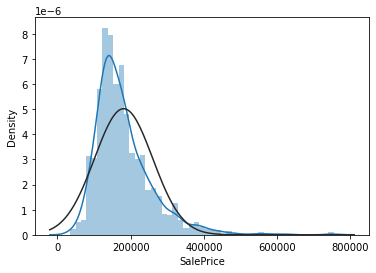

<Figure size 432x288 with 0 Axes>

In [ ]:
# Target Variable Transformation
sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()


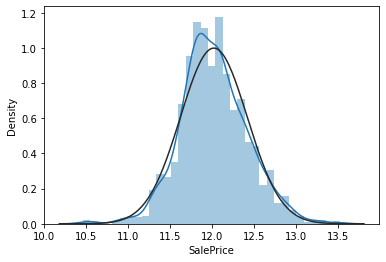

<Figure size 432x288 with 0 Axes>

In [ ]:
# It looks more normal now.
sns.distplot((data_train['SalePrice']+1).transform(np.log), fit=norm);
fig = plt.figure()

In [ ]:
data_train ['SalePrice_log'] = (data_train['SalePrice']+1).transform(np.log)

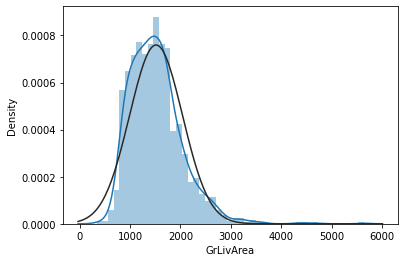

<Figure size 432x288 with 0 Axes>

In [ ]:
#GrLivArea
sns.distplot(data_train['GrLivArea'], fit=norm);
fig = plt.figure()

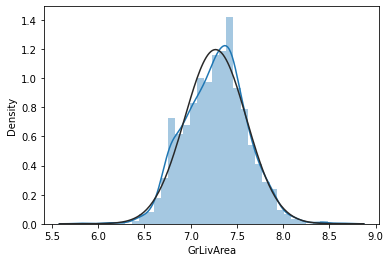

<Figure size 432x288 with 0 Axes>

In [ ]:
#transformed histogram and normal probability plot
sns.distplot((data_train['GrLivArea']+1).transform(np.log), fit=norm);
fig = plt.figure()

In [ ]:
data_train ['GrLivArea_log'] = (data_train['GrLivArea']+1).transform(np.log)

### **Context Features**

Extracting the parts of the date into different columns: Year, month, day, etc.

Extracting the time period between the current date and columns in terms of years, months, days, etc.

Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

In [ ]:
# How many since built?
data_train['built_since'] = 2019 - data_train['YearBuilt']

# How many years since remodeled?

data_train['remodeled_since'] = 2019 - data_train['YearRemodAdd'] 

**Scaling**

1. Normalization - (X - min(X)) / (max(X) - min(X))


2. Standardization - (X- mean(X)) / Std(X)

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?

Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling process. This process is not mandatory for tree based algorithms, but it might be still nice to apply.

# **Thank You**

# **Other methods for Feature Engineering (Optional)** 

## **1.Handling Missing Values**

Handling the missing values is one of the greatest challenges faced by analysts because making the right decision on how to handle it generates robust data models. Let us look at different ways of imputing the missing values.

### **1.	Mean/ Median/Mode Replacement**

We Solve this by replacing the missing value with either mean/median/mode. In the case of the categorical variables, we can use mode.

In [ ]:
# median =df[feature].median()
def impute_nan (df, feature, median):
  df[feature + "_median"]= df[feature].fillna(median)

### **2.	Imputing Random Values**

Random Value imputation consists of taking random observation from the dataset and we use this observation to replace the missing value.

In [ ]:
def impute_nan(df, feature):
  random_impute=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
  random_impute.index= df[df[feature].isnull()].index
  df.loc[df[feature].isnull(),feature+'random']=random_impute

### **3.	Imputing Arbitrary Values**

Arbitrary Value imputation consists of taking arbitrary value outer of the dataset and we use this value to replace the missing value.

In [ ]:
def impute_nan(df,feature):
  df[feature +"_zero"]=df[feature].fillna(0)
  df[feature+"_hundred"]= df[feature].fillna(100)

### **4.	Creating a new feature using  NaN values or changing existing  NaN  with other values**

Let there is a feature named Age, and some of the values are missed. Thus, we can create another feature while replacing NaN with 1 and non-NaN with 0.





In [ ]:
def impute_nan(df,feature):
  df[feature+"_nan"]=np.where(df[feature].isnull(),1,0)

Suppose if you have more frequent categories, We just replace NaN with a new category.

In [ ]:
def impute_nan(df,feature):
  df[feature+"_new"]=np.where(df[feature].isnull(),"missing",df[feature])

### **5.	End of Distribution Imputation**

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. The advantage is that it is quick and captures the importance of missing values (if one suspects the missing data is valuable).

In [ ]:
#extreme = df[feature].mean() + 3* df[feature].std()
# median =df[feature].median()
def impute_nan(df, feature, median, extreme):
  df[feature+ "_end_distribution"]= df[feature].fillna(extreme)
  df[feature].fillna(median, inplace = True)

### **6.	Frequent Categories Imputation**

It is used where a very less number of missing values are present. It’s otherwise known as the mode imputation while the total count of the mode value will be imputed. It’s easy and fast to implement.

In [ ]:
def impute_nan(df,feature):
  mode_category= df[feature].mode()[0]
  df[feature].fillna(mode_category, inplace = True)

### **7.	Creating a Sub-model to predict the missing value**

Here, we will create a sub-model while taking the non-missing value as a separate dataset(we will split and create a model with this dataset) and the missing vale as another dataset whose values are to be predicted.

### **8.	Deleting Column if Missing Value >60%**

If the complete row is having NaN values then it doesn’t make any value out of it. So such rows/columns are to be dropped immediately. Or if the % of row/column is mostly missing say about more than 60% then also one can choose to drop.

### **9.	Use Algorithms that support Missing Values**

KNN is a machine learning algorithm that works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values.

Another algorithm that can be used here is Random Forest. This model produces a robust result because it works well on non-linear and categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

Generally Tree based models can work with missing values.


## **2. Handling Outliers**

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. A point beyond an inner fence on either side is considered a **mild outlier**. A point beyond an outer fence is considered an **extreme outlier**.

Linear Regression, Logistic Regression, KMeans Clustering, Hierchical Clustering, and Nerual Networks are sensitive to outliers.

Decision Tree, Ensemble of decision trees, Naïve Bayes Classifier, and Support Vector Machine, are not sensitive to outliers.

Handling Outliers is a good practice before passing the data to the ML model as we can get a better model with good metrics.


### **1. Using Standard Deviation in Symmetric Curve**

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

In [ ]:
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()

In [ ]:
#data=df.copy()
#data.loc[data[feature]<= lower_boundary, ' ']=lower_boundary
#data.loc[data[feature]>= upper_boundary, ' ']=upper_boundary

### **2. Using IQR in Skew-symmetric Curve**

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ
3.	lower outer fence: Q1–3*IQ
4.	upper outer fence: Q3 + 3*IQ


In [ ]:
#Inner Fence
def outlier_treatment(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.25)+1.5*IQR

In [ ]:
#Outer Fence
def outlier_treatment(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR

In [ ]:
#data=df.copy()
#data.loc[data[feature]<= lower_bridge, ' ']=lower_bridge
#data.loc[data[feature]>= upper_bridge, ' ']=upper_bridge

### **3. Using Outlier Insensitive Algorithms**

Some algorithms that are not sensitive to outliers are Naive Bayes Classifier, Support Vector Machine, Decision Tree, Ensemble Techniques, and K-Nearest Neighbours. We can use these algorithms to get rid of outliers.

## **3. Categorical Encoding**

This means that categorical data must be encoded into numbers before we can use it to fit and evaluate a model. There are many ways to encode categorical variables for modeling as follows.

### **1.	Nominal Encoding**

Variable comprises a finite set of discrete values with no relationship between values. Some examples include:

•	A “pet” variable with the values: “dog” and “cat“.

•	A “color” variable with the values: “red“, “green“, and “blue“.

•	A “place” variable with the values: “first“, “second“, and “third“


**1.	One Hot Encoding**

•	One Hot Encoding means to encode or create additional features for all unique categorical values. For example, ‘Apple’, ‘ Chicken’, and ’Brocoli’ have been encoded as 1 in that place only where it is present.

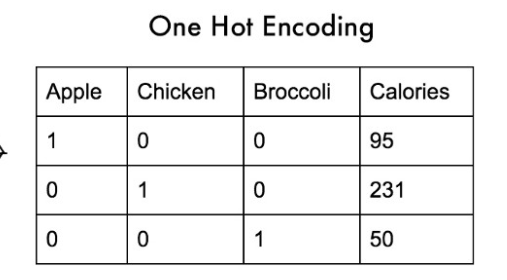

In [ ]:
#pd.get_dummies(df,drop_first= True)

**2.	One Hot Encoding with many  Categorical**

It is the same as one-hot encoding but the difference is Let you have more than 20 unique categories. Then if you will perform one-hot encoding to all those you will have additional 20 columns. This will lead to the Curse of Dimensionality. So, It has been observed from the KDD Orange Cup challenge that some top n no. of maximum categories are taken and encoded.

**3.	Mean Encoding**

Here, You will calculate the mean of the unique categories to the no. of occurrence in that dataset and encode them while creating a new column.

### **2. Ordinal Encoding**

Variable comprises a finite set of discrete values with a ranked ordering between values. In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.


**1. Label Encoding**

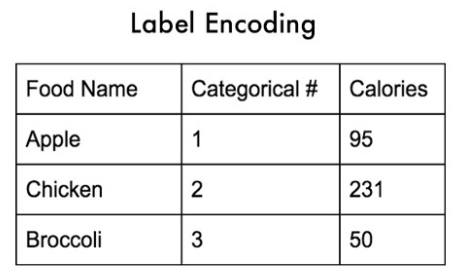

In this type of encoding, You have to encode the unique categories as per their rating as shown in the above image.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
print(le.classes_)
print(le.transform([1, 1, 2, 6]))
print(le.inverse_transform([0, 0, 1, 2]))


[1 2 6]
[0 0 1 2]
[1 1 2 6]


**2. Target Guided Ordinal Encoding**

First, you have to calculate the mean as same in mean encoding but here you won’t encode them with their mean values. Here, you will have to perform label encoding based on those mean values. so, in other words, “target guided ordinal encoding = mean encoding +label encoding.”

**3.	Count or Frequency Encoding**

In this type of encoding, you have to encode the unique categories by their total no. of occurrences in that dataset and particularly in that categorical column.

**4. Probability Ratio Encoding**

This encoding is purely based on probability. If it’s possible to calculate the probability or it’s a probability type problem, You can use this type of encoding by calculating the probabilities. For example, If you are working with some dataset like survive and not- survive in “Titanic Dataset”. There you can use probability encoding.

## **4. Data Transformation**

It refers to putting the values in the same range or same scale so that no variable is dominated by the other.

Most of the time, the collected data set contains features highly varying in magnitudes, units, and ranges. If scaling is not done then the algorithm only takes magnitude into account and not units hence incorrect modeling. To solve this issue, we have to do scaling to bring all the variables to the same level of magnitude.


### **1.	Standardization**

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


### **2.	Normalization**

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.data_max_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

MinMaxScaler(copy=True, feature_range=(0, 1))
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[1.5 0. ]]


### **3.	Robust Scalar**

It is used to scale the feature to median and quantile. Scaling using median and quantiles consists of subtracting the median from all the observations and then dividing by the interquartile difference. The inter quantile difference is the difference between the 75th and 25th.

In [ ]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
    [ -2.,  1.,  3.],
    [ 4.,  1., -2.]]
transformer = RobustScaler().fit(X)
print(transformer)
print(transformer.transform(X))


RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
[[ 0.  -2.   0. ]
 [-1.   0.   0.4]
 [ 1.   0.  -1.6]]


### **4. Gaussian Transformation**


Some machine learning algorithms like linear and logistic regression assume that the features are normally distributed. So, we need to transform the features by the following methods.

**Logarithmic Transformation:** Transforming using a logarithmic function.


```
np.log(df[feature])
```



**Inverse Transformation:** Transforming using an inverse function. 

```
1/(df[feature])
```

**Square Root Transformation:** Transforming using a square function. 

```
np.sqrt(df[feature])
```


**Exponential Transformation:** Transforming using an exponential function. 
```
(df[feature])**(1/1.2)
```

### **5. Box-Cox Transformation**

A Box-Cox transformation is a transformation of a non-normal dependent variable into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you can run a broader number of tests.

The Box-Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a 1964 paper and developed the technique.

T(y)=(y exp(lambda)-1)/(lambda)

where y is the response variable and ‘lambda’ is the transformation parameter from -5 to 5. In the transformation, all values of ‘lambda’ are considered and the optimal value for a given variable is selected.


In [ ]:
#scipy.stats.boxcox(x, lmbda=None, alpha=None, optimizer=None)

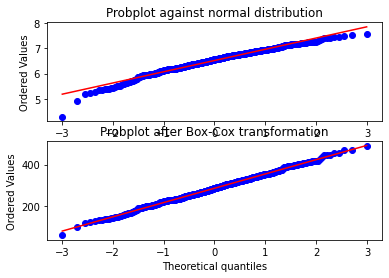

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

## **5. Handling Imbalanced Dataset**

 1. Cross-Validation
 2. Under Sampling
 3. Over Sampling
 4. SMOTE
 5. The Metric Trap
 6. Penalise Algorithms
 7. Tree-Based Algorithms

We have separate Lectures and videos for Handling Imbalanced Datasets.
It will help you to connect the approach.


## **6. Data Reduction**

Let us assume we have a dataset of billions of rows of data. Now we will require high computationally cost and timing cost to work on that population. So, Here Data reduction comes in handy. Data reduction is a process that reduced the volume of original data and represents it in a much smaller volume. Data reduction techniques ensure the integrity of data while reducing the data. It is done to avoid the curse of dimensionality. Curse of Dimensionality refers to a set of problems that arise when working with high-dimensional data and working with high dimensionality we will have a chance of overfitting. So, without changing the feature and deleting the attributes.

### **1.	Dimensionality Reduction**

Dimensionality reduction eliminates the attributes from the data set under consideration thereby reducing the volume of original data. In the section below, we will discuss three methods of dimensionality reduction. Those are Wavelet Transform, Principal Component Analysis, and Attribute Subset Selection. It will reduce the data from high dimensionality to low dimensionality.

We have a separate lecture and video for Principal Component Analysis.

### **2.	Numerosity Reduction**

The numerosity reduction reduces the volume of the original data and represents it in a much smaller form. This technique includes two types parametric and non-parametric numerosity reduction. Parametric numerosity reduction incorporates ‘storing only data parameters instead of the original data. One method of parametric numerosity reduction is the ‘regression and log-linear method. Non-parametric numerosity reduction involves Histogram, Sampling Techniques, and Data cube aggregation. Sampling Techniques involve several techniques like Random Sampling, Stratified sampling, Selective sampling, and Cluster sampling.

### **Feature Selection**

Feature selection is the process of reducing the number of input variables when developing a predictive model.
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.


In [ ]:
from sklearn.model_selection import train_test_split
def split(df,target_feature):
  x=df.drop(target_feature, axis=1)
  y=df[target_feature]
  x_train,x_test,y_train,y_test= train_test_split(x,y)
  return x,y,x_train,x_test,y_train,y_test


# x,y,x_train,x_test,y_train,y_test=split(df, target_feature)

**1. Using Pearson Correlation**


A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables
The correlation coefficient has values between -1 to 1

•	A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

•	A value closer to 1 implies stronger positive correlation

•	A value closer to -1 implies stronger negative correlation


In [ ]:
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

**2. Variable inflation Factor**

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

•	Calculate the VIF factors.

•	Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.


In [ ]:
def cal_vif(x):
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  thresh=5
  output=pd.DataFrame()
  k=x.shape[1]
  vif= [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
  for i in range(i,k):
    print("Iteration No. ", i)
    print(vif)
    a=np.argmin(vif)
    print("Max vif is for variable no : ", a)
    if(vif[a]<=thresh):
      break
    if (i==1):
      output = x.drop(x.columns[a],axis=1)
      vif= [variance_inflation_factor(output.values,j)for j in range (output.shape[1])]
    elif (i>1):
      output= output.drop(output.columns[a],axis=1)
      vif=[variance_inflation_factor(output.values,j) for j in range (output.shape[1])]
  return (output)

**3. Forward Elimination**


Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [ ]:
def forward_elimination (x,y):
  from sklearn.linear_model import LogisticRegression
  lr=LogisticRegression()
  from mlxtend.feature_selection import SequentialFeatureSelector
  ffs= SequentialFeatureSelector(lr, k_features="best", forward= True, n_jobs=-1)
  ffs.fit(x,y)
  features=list(ffs.k_feature_names_)
  return features

**4.	Backward Elimination**

In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

In [ ]:
def backward_elimination (x,y):
  from sklearn.linear_model import LogisticRegression
  lr=LogisticRegression()
  from mlxtend.feature_selection import SequentialFeatureSelector
  bfs=SequentialFeatureSelector(lr, k_features="best",forward=False, n_jobs=-1)
  bfs.fit(x_train,y_train)
  features= list(bfs.k_feature_names_)
  return features

**5. Recursive Feature elimination**

It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [ ]:
def recursive_elimination(x_train,y_train,x_test,y_test):
  from sklearn.feature_selection import RFE
  rfe=RFE(lr,n_features_to_select=7)
  rfe.fit(x_train,y_train)
  y_pred=rfe.predict(x_test)
  return y_pred

**6. Embedded Method**

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

Example: Random Forest Importance


In [ ]:
def randomforest_embedded(x,y):
  from sklearn.ensemble import RandomForestClassifier
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=340)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  final_df.plot.bar(color='teal')

**7. Dropping Constant Feature**


Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

In [ ]:
def dropping_constant(x,y):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0)
  var_thres.fit(x,y)
  var_thres.get_support()

No Low variance column if that returned as True.

**8. Fisher Score**

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [ ]:
def fisher_feature(df,x,y):
  from skfeature.function.similarity_based import fisher_score
  import matplotlib.pyplot as plt
  %matplotlib inline
  # Calculating Scores
  ranks= fisher_score.fisher_score(x,y)
  #plotting the ranks
  feat_importances= pd.Series(ranks,df.columns[0:len(df.columns)-1])
  feat_importances.plot(kind='barh', color='teal')
  plt.show()


### **Univariate Feature Selection**

**(1) use chi-square test.**

For more information about the chi-square test, read:

•	statistics: http://vassarstats.net/textbook/, chapter 8

•	Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2

Read the source code if you want to know more about how Sklearn apply chi-square test: https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/feature_selection/univariate_selection.py#L172

The first four elements in the array are true, which means the first four features were selected by this method. Since these features are the original features in the data, the chi-square test performs well.


**(2) use f test**

•	statistics

one-way ANOVA :
http://vassarstats.net/textbook/, chapter 14

ANOVA for regression:
http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

•	Sklearn

f test for classification:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

f test for regression:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

The f test can also correctly select the original features.


**(3) use mutual_info_classif test**

•	for classification: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

•	for regression: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression
